In [1]:
import numpy as np
import matplotlib.pyplot as plt


<Figure size 432x288 with 0 Axes>

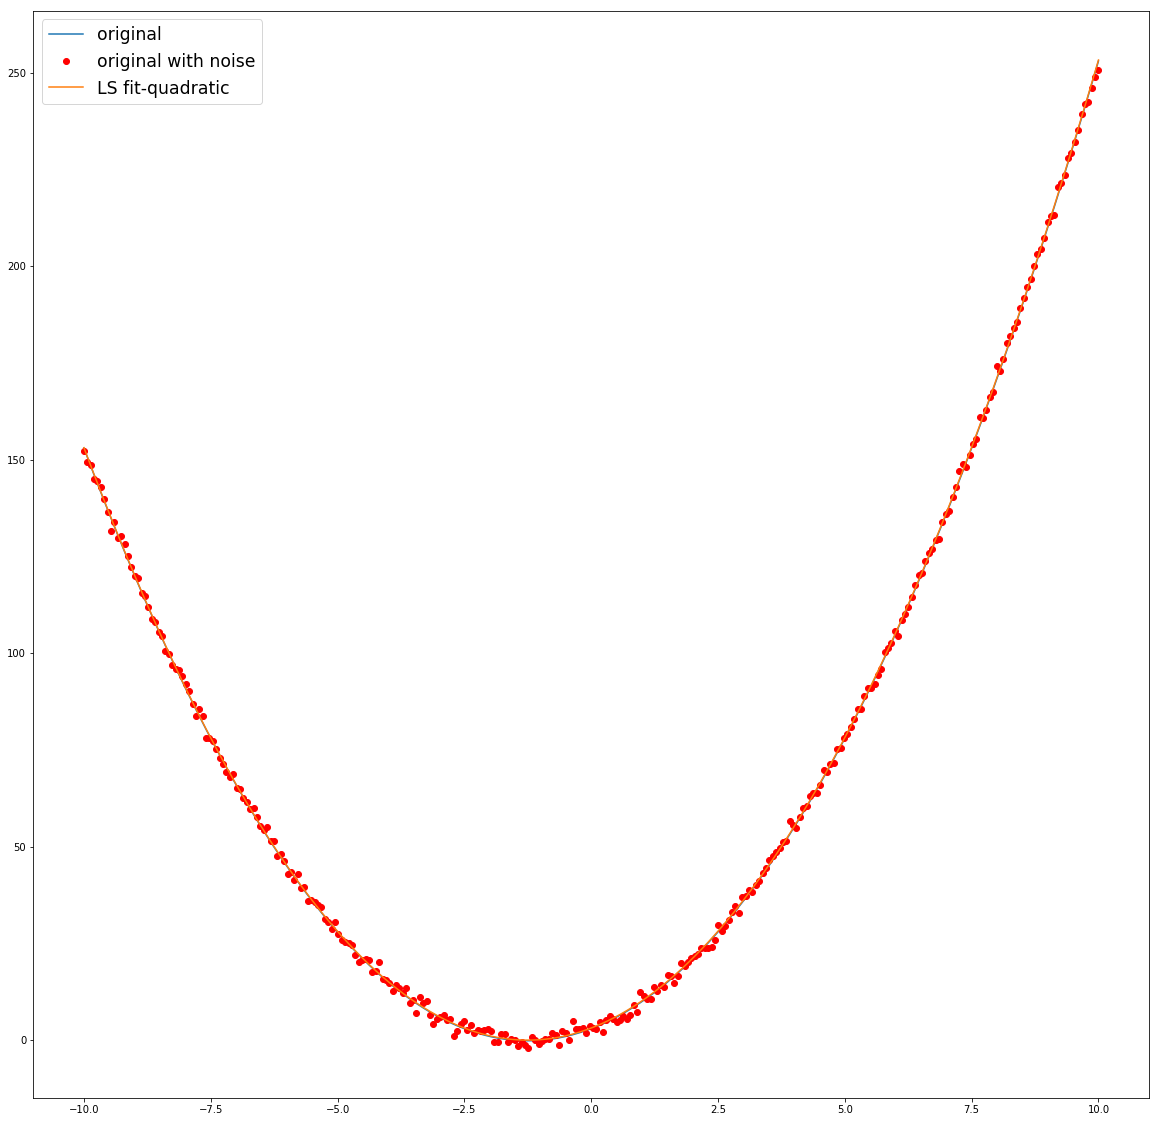

<Figure size 432x288 with 0 Axes>

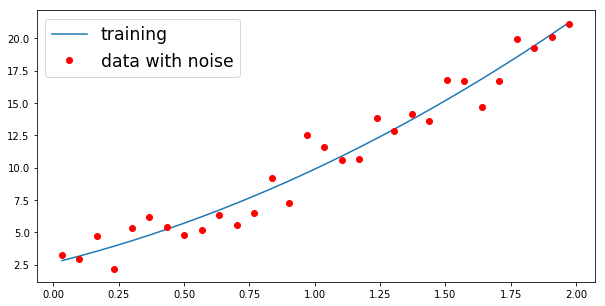

<Figure size 432x288 with 0 Axes>

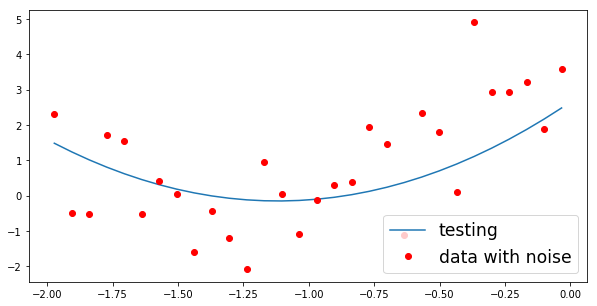

1.3546817554358934
1.4371985036660635
1.7667119883498288


In [14]:
## quadratic case

a=2 # coeffients of quadratic
b=5 
c=3 
N=300
var_noise=1.5
e=np.random.normal(loc=0,scale=(var_noise**0.5),size=N) #noise 
x=np.linspace(-10,10,num=N) # x data points 
y=(a*(x**2))+(b*x)+c #exact curve 
y1=y+e #addign noise to signal
plt.figure()
f = plt.figure(figsize=(20,20))
plt.plot(x,y,label='original')
plt.plot(x,y1,'ro',label='original with noise')


#basis set

xb=np.ones((N,3))
xb[:,0]=x**2
xb[:,1]=x
#beta=(X'X)^(-1)*(X'y)
t=np.transpose(xb)
i=np.matmul(t,xb)
beta=np.matmul((np.linalg.inv(i)),(np.matmul(t,y1)))

y_hat=np.matmul(xb,beta)
plt.plot(x,y_hat,label='LS fit-quadratic')
plt.legend(loc='upper left',fontsize='xx-large')
plt.show()
mse=np.mean((y1-y_hat)**2)




####TRAINING
#training from portion of data 
#train [0 2]
z=np.asarray(np.where((x>=0) & (x<=2)))#locations of 0<x<2
x_train=x[(x>=0) & (x<=2)]#x values satisfying criterion
length=len(x_train)
#creating x matrix 
xb_train=np.ones((length,3))
xb_train[:,0]=x_train**2
xb_train[:,1]=x_train
#y values associated with training data selected
y1_train=np.transpose([y1[i] for i in z])#transposing here to get correct shape (N,1), nothing to do 
#with beta

#calculating beta
t_train=np.transpose(xb_train)
i_train=np.matmul(t_train,xb_train)
beta_train=np.matmul((np.linalg.inv(i_train)),(np.matmul(t_train,y1_train)))

plt.figure()
f = plt.figure(figsize=(10,5))
y_hat_train=np.matmul(xb_train,beta_train)
plt.plot(x_train,y_hat_train,label='training')
plt.plot(x_train,y1_train,'ro',label='data with noise')
plt.legend(loc='upper left',fontsize='xx-large')
plt.show()
mse_training=np.mean((y1-y_hat)**2)

# testing an other data
z1=np.asarray(np.where((x>=-2) & (x<=0)))#locations of -2<x<0
x_test=x[(x>=-2) & (x<=0)] # x values of testing set
length2=len(x_test)# x matrix
xb_test=np.ones((length2,3))
xb_test[:,0]=x_test**2
xb_test[:,1]=x_test


y1_test=np.transpose([y1[i] for i in z1])# again transposing to get correct shape
y1_hat_test=np.matmul(xb_test,beta_train)



plt.figure()
f = plt.figure(figsize=(10,5))
plt.plot(x_test,y1_hat_test,label='testing')
plt.plot(x_test,y1_test,'ro',label='data with noise')
plt.legend(loc='lower right',fontsize='xx-large')
plt.show()

#mean squared errors 
mse_original=np.mean((y1-y_hat)**2)
mse_training=np.mean((y_hat_train-y1_train)**2)
mse_testing=np.mean((y1_hat_test-y1_test)**2)
print(mse_original)
print(mse_training)
print(mse_testing)

#seems accuracy of prediction of testing set is highly dependant on number of data points, the variance 
#and ( for cases with a low N) how "lucky" you get with the random noise generated. 
#on the whole, mse seems to be similar for the training set to the whole data but mse is often very large for testing
#data set 

#for this example, the staionaary point is -1.2 i.e close to zero, which i think makes it especially hard 
# for the LS fit to accurately model the range [-2 0 ], which straddles the stationary point

# for values of N roughly > 300, the mse become approximately the same

9.74622571644599


<Figure size 432x288 with 0 Axes>

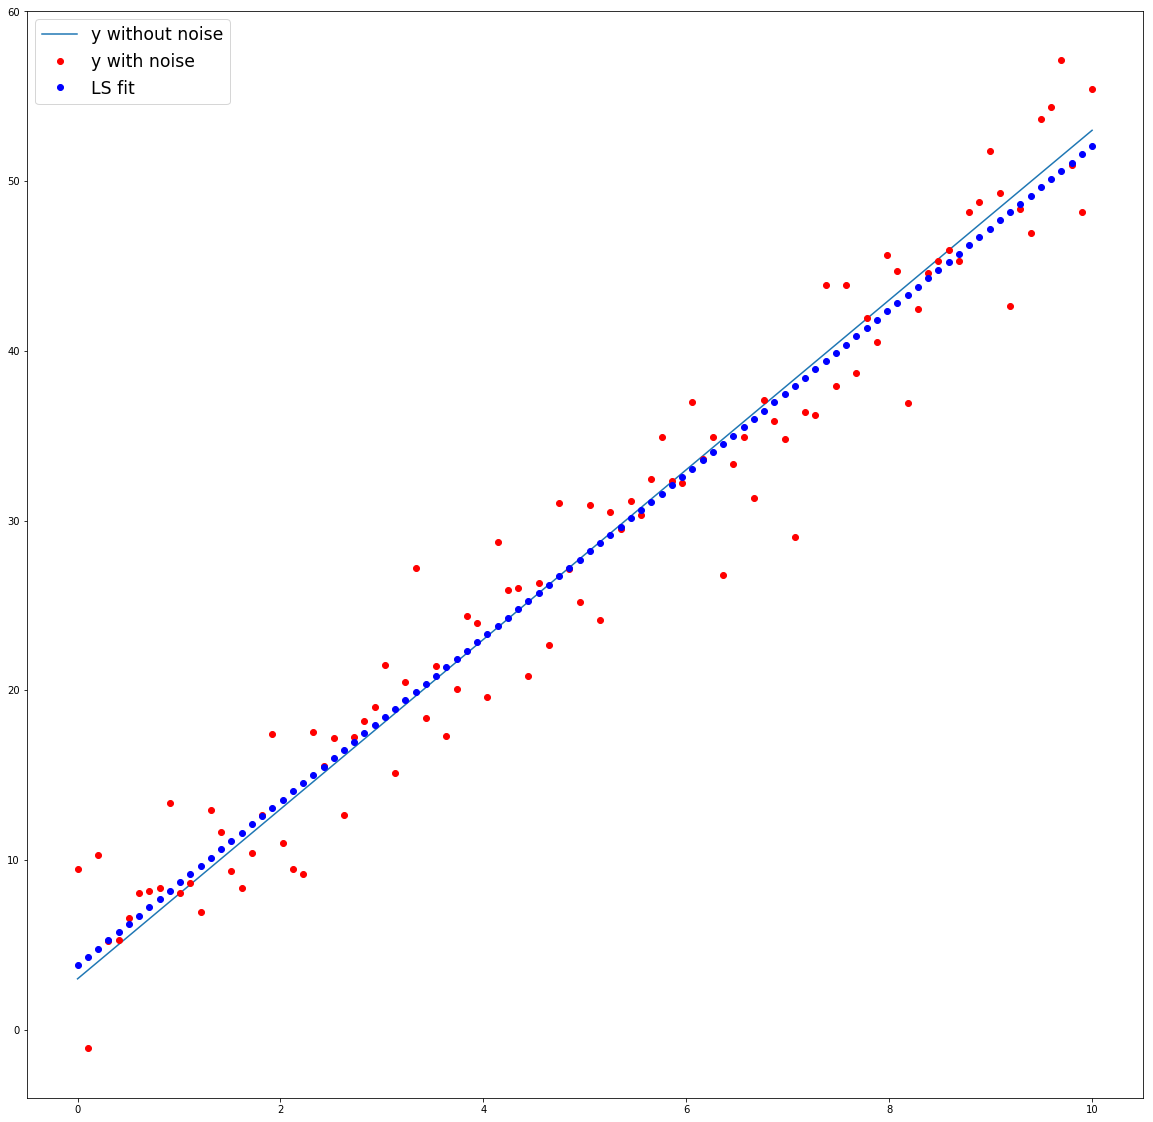

In [3]:
#linear case 
m=5 #gradient
c=3 #intercept
N=100
var_noise=10
e=np.random.normal(loc=0,scale=(var_noise**0.5),size=N)
x=np.linspace(0,10,num=N)
y=(m*x)+c
y1=y+e
plt.figure()
f = plt.figure(figsize=(20,20))
plt.plot(x,y,label='y without noise')
plt.plot(x,y1,'ro',label='y with noise')


ones=np.ones(N)
zeros=np.ones(N)
xb=np.ones((N,2))
xb[:,0]=x
#beta=(X'X)^(-1)*(X'y)

t=np.transpose(xb)
i=np.matmul(t,xb)
beta=np.matmul((np.linalg.inv(i)),(np.matmul(t,y1)))

y_hat=np.matmul(xb,beta)
plt.plot(x,y_hat,'bo',label='LS fit')
plt.legend(loc='upper left',fontsize='xx-large')

# mean squared error. 
mse=np.mean((y1-y_hat)**2)
print(mse)
##increasing the variance generally makes the LS fit less accurate, 
#often seems to 'pivot' around real line.
#when variance is small, least squares is almost exact with mse<1



<Figure size 432x288 with 0 Axes>

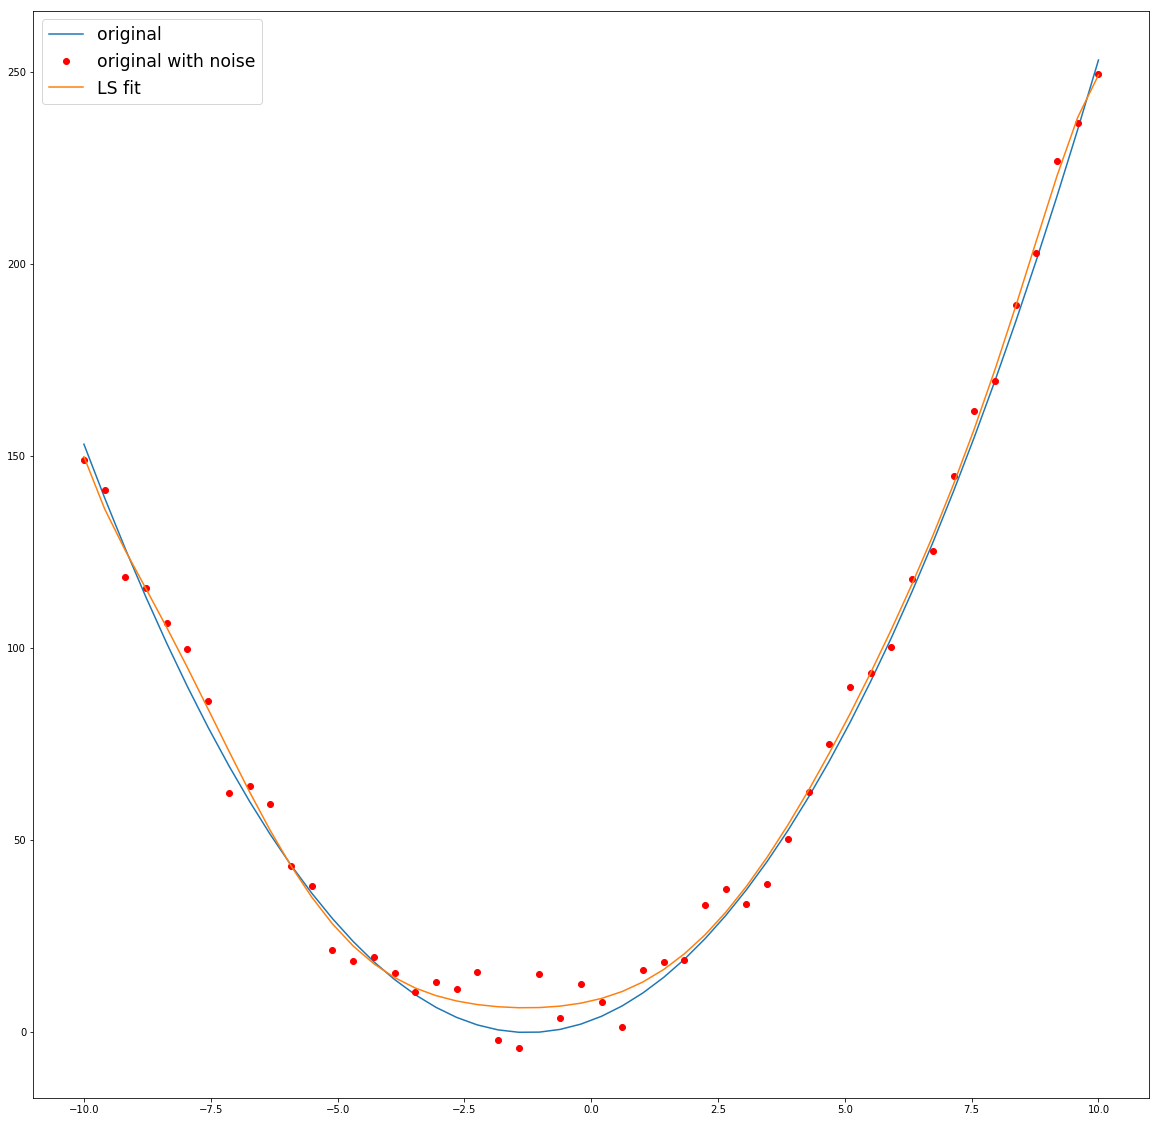

23.426884491257873


In [4]:
## quadratic case with high dimensional fit
a=2
b=5 #gradient
c=3 #intercept
N=50
var_noise=30
e=np.random.normal(loc=0,scale=(var_noise**0.5),size=N)
x=np.linspace(-10,10,num=N)
y=(a*(x**2))+(b*x)+c
y1=y+e
plt.figure()
f = plt.figure(figsize=(20,20))
plt.plot(x,y,label='original')
plt.plot(x,y1,'ro',label='original with noise')



xb=np.ones((N,10))
xb[:,0]=x**9
xb[:,1]=x**8
xb[:,2]=x**7
xb[:,3]=x**6
xb[:,4]=x**5
xb[:,5]=x**4
xb[:,6]=x**3
xb[:,7]=x**2
xb[:,8]=x



#beta=(X'X)^(-1)*(X'y)
t=np.transpose(xb)
i=np.matmul(t,xb)
beta=np.matmul((np.linalg.inv(i)),(np.matmul(t,y1)))

y_hat=np.matmul(xb,beta)
plt.plot(x,y_hat,label='LS fit')
plt.legend(loc='upper left',fontsize='xx-large')
plt.show()
mse=np.mean((y1-y_hat)**2)
print(mse)
